In [2]:
#imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, confusion_matrix

# Load files

In [3]:
X_train_raw = pd.read_csv("./data/X_train.csv")
X_submission_raw = pd.read_csv("./data/X_submission.csv")

In [3]:
X_train_raw.head()

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,0,0005019281,ADZPIG9QOCDG5,0,0,4.0,1203984000,good version of a classic,This is a charming version of the classic Dick...
1,1,0005019281,A35947ZP82G7JH,0,0,3.0,1388361600,Good but not as moving,It was good but not as emotionally moving as t...
2,2,0005019281,A3UORV8A9D5L2E,0,0,3.0,1388361600,Winkler's Performance was ok at best!,"Don't get me wrong, Winkler is a wonderful cha..."
3,3,0005019281,A1VKW06X1O2X7V,0,0,5.0,1202860800,It's an enjoyable twist on the classic story,Henry Winkler is very good in this twist on th...
4,4,0005019281,A3R27T4HADWFFJ,0,0,4.0,1387670400,Best Scrooge yet,This is one of the best Scrooge movies out. H...


# Analyze Data

In [26]:
X_train_5stars = X_train_raw[X_train_raw['Score'] == 5.0]
X_train_4stars = X_train_raw[X_train_raw['Score'] == 4.0]
X_train_3stars = X_train_raw[X_train_raw['Score'] == 3.0]
X_train_2stars = X_train_raw[X_train_raw['Score'] == 2.0]
X_train_1stars = X_train_raw[X_train_raw['Score'] == 1.0]

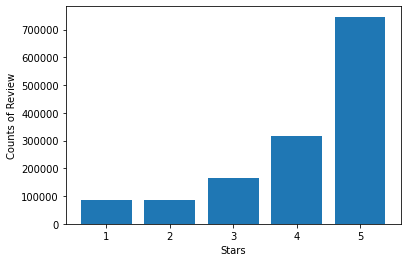

In [118]:
stars_amount = [len(X_train_1stars.index), len(X_train_2stars.index), len(X_train_3stars.index), len(X_train_4stars.index), len(X_train_5stars.index)]
plt.bar(list(range(1, 6)), stars_amount)
plt.xlabel('Stars')
plt.ylabel('Counts of Review')
plt.show()

In [24]:
from collections import Counter
import itertools

In [ ]:
preprocessed_5stars = preprocess_text_stop(X_train_5stars, 'Text')

In [ ]:
preprocessed_4stars = preprocess_text_stop(X_train_4stars, 'Text')

In [ ]:
preprocessed_3stars = preprocess_text_stop(X_train_3stars, 'Text')

In [ ]:
preprocessed_2stars = preprocess_text_stop(X_train_2stars, 'Text')

In [ ]:
preprocessed_1stars = preprocess_text_stop(X_train_1stars, 'Text')

In [129]:
counts_5stars = Counter(list(itertools.chain.from_iterable(preprocessed_5stars)))
print(counts_5stars.most_common(20))

[('movie', 690284), ('one', 496403), ('film', 482891), ('great', 362394), ('like', 298343), ('good', 262921), ('love', 226647), ('time', 224599), ('story', 219123), ('dvd', 203204), ('see', 198185), ('well', 197418), ('really', 186829), ('first', 186542), ('would', 182716), ('also', 179641), ('best', 178716), ('get', 175050), ('series', 166571), ('show', 165241)]


In [128]:
counts_4stars = Counter(list(itertools.chain.from_iterable(preprocessed_4stars)))
print(counts_4stars.most_common(20))

[('movie', 368663), ('film', 323991), ('one', 251574), ('good', 199960), ('like', 182201), ('great', 132522), ('story', 128584), ('well', 116691), ('would', 115985), ('time', 114475), ('really', 112666), ('also', 103378), ('first', 103123), ('much', 102832), ('see', 100293), ('get', 96959), ('even', 91780), ('dvd', 83752), ('two', 79267), ('films', 75175)]


In [126]:
counts_3stars = Counter(list(itertools.chain.from_iterable(preprocessed_3stars)))
print(counts_3stars.most_common(20))

[('movie', 215819), ('film', 180331), ('one', 129359), ('like', 110555), ('good', 105508), ('would', 73641), ('story', 69799), ('much', 69522), ('really', 68174), ('time', 59408), ('get', 55742), ('first', 54594), ('see', 54009), ('well', 53307), ('great', 53162), ('even', 53029), ('also', 48999), ('dont', 44606), ('little', 43261), ('better', 43192)]


In [124]:
counts_2stars = Counter(list(itertools.chain.from_iterable(preprocessed_2stars)))
print(counts_2stars.most_common(20))

[('movie', 125668), ('film', 92236), ('one', 69504), ('like', 63356), ('good', 45364), ('would', 39950), ('really', 38024), ('much', 36048), ('even', 35104), ('story', 34471), ('time', 30985), ('get', 30417), ('see', 28466), ('dont', 26941), ('first', 26529), ('bad', 25169), ('could', 23939), ('better', 22907), ('well', 22825), ('two', 22755)]


In [125]:
counts_1stars = Counter(list(itertools.chain.from_iterable(preprocessed_1stars)))
print(counts_1stars.most_common(20))

[('movie', 124521), ('film', 64124), ('one', 59416), ('like', 53836), ('even', 36141), ('would', 36033), ('bad', 31314), ('good', 30041), ('time', 29345), ('dont', 28297), ('get', 27050), ('really', 26436), ('see', 24406), ('movies', 24119), ('people', 22137), ('story', 21732), ('much', 21526), ('could', 21428), ('first', 21112), ('make', 20324)]


In [31]:
counts_5stars_summary = Counter(list(itertools.chain.from_iterable(X_train_5stars['Summary'])))

# Process the DataFrames

In [4]:
# This is where you can do more feature extraction
def process_df(X_train_raw, X_submission_raw, columns_drop, submission_drop):
    
    X_train_raw = X_train_raw[X_train_raw['HelpfulnessNumerator'] <= X_train_raw['HelpfulnessDenominator']]
    X_train_raw = X_train_raw.dropna()
    print("Size of data:", X_train_raw.shape)
    
    X_train, X_test, Y_train, Y_test = train_test_split(
        X_train_raw.drop(['Score'], axis=1),
        X_train_raw['Score'],
        test_size=1/4.0,
        random_state=0
    )
    
    X_train_processed = X_train.drop(columns=columns_drop)
    X_test_processed = X_test.drop(columns=columns_drop)
    X_submission_processed = X_submission_raw.drop(columns=submission_drop)
    
    return X_train_processed, X_test_processed, X_submission_processed, Y_train, Y_test

X_train_processed, X_test_processed, X_submission_processed, Y_train, Y_test = process_df(X_train_raw,X_submission_raw, ['Id', 'ProductId', 'UserId', 'Summary', 'Time'], ['Id', 'ProductId', 'UserId', 'Summary', 'Score'])


Size of data: (1397455, 9)


In [5]:
X_train_summary, X_test_summary, X_submission_summary, Y_train_summary, Y_test_summary = process_df(X_train_raw,X_submission_raw, ['Id', 'ProductId', 'UserId', 'Text', 'Time'], ['Id', 'ProductId', 'UserId', 'Text', 'Summary', 'Score'])

Size of data: (1397527, 9)


In [6]:
X_train_summary.head()

,HelpfulnessNumerator,HelpfulnessDenominator,Summary
433037,1,1,This Is Not A Film About Golf
604900,1,1,i wonder what klink & schultz were up to ...
28716,5,6,Every REAL MAN in America should see this movie
800547,0,0,NWO a decent event
488590,3,5,The Extended Version will rate a 5 star review


In [7]:
X_train_processed.head()

,HelpfulnessNumerator,HelpfulnessDenominator,Text
433037,1,1,Steven Pressfield is one of America's greatest...
604900,1,1,a wonderfully bizarre take on the rise & fall ...
28716,5,6,I suppose I shouldn't be surprised by so many ...
800547,0,0,1.cruiserweight invitational for the wwe cruis...
488590,3,5,"Of the three movies, The Return of the King be..."


In [8]:
Y_train_summary.head()

433037    5.0
604900    4.0
28716     5.0
800547    3.0
488590    4.0
Name: Score, dtype: float64

In [9]:
Y_train.head()

433037    5.0
604900    4.0
28716     5.0
800547    3.0
488590    4.0
Name: Score, dtype: float64

In [10]:
print(X_train_processed.shape)
print(X_test_processed.shape)
print(X_submission_processed.shape)

(1048145, 3)
(349382, 3)
(300000, 3)


<h3> CountVectorizer score NLP </h3>

In [5]:
#imports for NLP
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
import re, itertools
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Touch\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
def remove_special_char(text):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

In [7]:
def preprocess_text_nosent(df, column):
#     texts = df[column]
#     processed_text = []
#     count = 0
#     for t in texts:
#         if(count != 0 and count % 100000 == 0):
#             print(count)
#         processed_text.append(remove_special_char(str(t)).strip().lower())
#         count+=1
    processed_texts = df[column].apply(lambda row: remove_special_char(str(row)).strip().lower())
    
    return processed_texts

In [8]:
def preprocess_text_stop(df, column, total_length=False):
    stopwords_list = stopwords.words('english')
    
    
    if(total_length):
        total_length = int(len(df.index)*0.7)
        texts = df[column].head(total_length)
    else:
        print('Full Length')
        total_length = len(df.index)
        texts = df[column]
    print('total rows:', total_length)
    
    texts = texts[column].apply(lambda row: remove_special_char(str(row)).strip().lower())
    
    processed_text = []
    count = 0
    for t in texts:
        if(count != 0 and count % 100000 == 0):
            print(count)
        processed_text.append([x for x in word_tokenize(t) if x not in stopwords_list])
        count+=1
    return processed_text

In [14]:
def count_vectorizer(df_train_processed, df_test_processed, n_gram=(1,1)):
    vectorizer = CountVectorizer(stop_words="english", ngram_range=n_gram)
    X_train = vectorizer.fit_transform(df_train_processed)
    X_test = vectorizer.transform(df_test_processed)
    X_submission = vectorizer.transform(df_submission_processed)
    
    return X_train, X_test, X_submission

In [10]:
def tfidf_vectorizer(df_train_processed, df_test_processed, df_submission_processed):
    vectorizer = TfidfVectorizer(stop_words="english")
    X_train = vectorizer.fit_transform(df_train_processed)
    X_test = vectorizer.transform(df_test_processed)
    X_submission = vectorizer.transform(df_submission_processed)
    
    return X_train, X_test, X_submission

In [ ]:
def process_df(df, del_col, new_column, data):
    new_df = df.drop(columns=del_col)
    new_df[new_column] = data
    
    return new_df

<h4> Text Counter/Tfidf </h4>

In [11]:
df_train_processed_nosent = preprocess_text_nosent(X_train_processed, 'Text')
df_test_processed_nosent = preprocess_text_nosent(X_test_processed, 'Text')

In [12]:
df_submission_processed_nosent = preprocess_text_nosent(X_submission_processed, 'Text')

In [ ]:
df_train_processed_nostop = preprocess_text_stop(X_train_processed, 'Text', total_length=True)
df_test_processed_nostop = preprocess_text_stop(X_test_processed, 'Text')

<h5> Without removing stopwords </h5>

In [19]:
# X_train_cv, X_test_cv, X_submission_cv = count_vectorizer(df_train_processed_nosent, df_test_processed_nosent, df_submission_processed_nosent)
vectorizer = CountVectorizer(stop_words="english")
X_train_cv = vectorizer.fit_transform(df_train_processed_nosent)
X_test_cv = vectorizer.transform(df_test_processed_nosent)
X_submission_cv = vectorizer.transform(df_submission_processed_nosent)

In [ ]:
X_train_cv2, X_test_cv2 = count_vectorizer(df_train_processed_nosent, df_test_processed_nosent, n_gram=(2,2))

In [ ]:
X_train_tfidf, X_test_tfidf = tfidf_vectorizer(df_train_processed_nosent, df_test_processed_nosent)

<h5> With removing stopwords </h5>

In [ ]:
X_train_cv_stop, X_test_cv_stop = count_vectorizer(df_train_processed_nostop, df_test_processed_nostop)

In [ ]:
X_train_tfidf_stop, X_test_tfidf_stop = tfidf_vectorizer(df_train_processed_nostop, df_test_processed_nostop)

<h4> Summary Counter/Tfidf </h4>

In [ ]:
df_train_summary_nosent = preprocess_text_nosent(X_train_summary, 'Summary')
df_test_summary_nosent = preprocess_text_nosent(X_test_summary, 'Summary')

In [ ]:
X_train_summary_cv, X_test_summary_cv = count_vectorizer(df_train_summary_nosent, df_test_summary_nosent)

In [ ]:
X_train_summary_cv2, X_test_summary_cv2 = count_vectorizer(df_train_summary_nosent, df_test_summary_nosent, n_gram=(2,2))

In [ ]:
X_train_summary_tfidf, X_test_summary_tfidf = tfidf_vectorizer(df_train_summary_nosent, df_test_summary_nosent)

<h3> Semantic Analysis using VADER NLP </h3>

In [16]:
#import Vader for sentiment anaylsis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Touch\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

From this one sample of Sentiment Analysis VADER, we could see that even though the text described the book being good it is still getting a negative compound polarity scores which is due to the fact that the reviewers are using negative connotation words to describe of the book.

In [17]:
#text segmentation & sid
def sia_run(df, column):
    new_df = df.copy()
    count = 0
    sia = SentimentIntensityAnalyzer()
#     scores = []
#     for index, row in df.iterrows():
#         if(count%100000 == 0):
#             print(count)
#         ss = sia.polarity_scores(str(row[column]))
#         scores.append(ss['compound'])
#         count += 1
#     new_df['VADER Score'] = scores
    
    new_df['VADER Score'] = df[column].apply(lambda row: sia.polarity_scores(str(row))['compound'])

    
    return new_df.drop(columns=[column])

In [ ]:
X_train_processed_sia = sia_run(X_train_processed, 'Text')

In [ ]:
X_train_processed_sia.head()

In [18]:
X_train_summary_sia = sia_run(X_train_summary, 'Summary')

In [24]:
X_test_summary_sia = sia_run(X_test_summary, 'Summary')

In [19]:
X_train_summary_sia.head()

,HelpfulnessNumerator,HelpfulnessDenominator,VADER Score
433037,1,1,0.0
604900,1,1,0.0
28716,5,6,0.0
800547,0,0,0.0
488590,3,5,0.0


# Learn the model

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

<h4> kNN Model </h4>

In [23]:
#KNN Model
Knn_model = KNeighborsClassifier(n_neighbors=3).fit(X_train_summary_sia, Y_train_summary)

In [19]:
Knn_model_original = KNeighborsClassifier(n_neighbors=3).fit(X_train_processed.drop(columns=['Text']), Y_train)

<h5> Text without stopwords </h5>

In [ ]:
Knn_model_stop = KNeighborsClassifier(n_neighbors=5).fit(X_train_cv_stop, Y_train.head(int(len(Y_train.index)*0.7)))

<h4> Decision Tree Model</h4>

In [ ]:
#Decistion tree
dtc = DecisionTreeClassifier(min_samples_split=5, random_state=111)

<h4> SVM Model </h4>

In [ ]:
#Support Vector Machine (Kernel: RBF)
svc = SVC().fit(X_train_processed.drop(columns=['Text']), Y_train, class_weight='balanced')

<h4> Naive Bayes </h4>

<h5> Text </h5>

In [46]:
def preprocess_text_analyzer(text):
    text = remove_special_char(str(text)).strip().lower()
    return [w for w in word_tokenize(text) if w not in stopwords.words('english')]

In [60]:
pipeline = Pipeline([
    ('Tf-Idf', TfidfVectorizer(ngram_range=(1,2), analyzer=preprocess_text_analyzer)),
    ('classifier', MultinomialNB())
])

In [ ]:
pipeline.fit(X_train_processed['Text'], Y_train)

In [ ]:
pip_pred = pipeline.predict(X_test_processed['Text'])

In [ ]:
rev_test_pred_NB_df = pd.DataFrame(data={'Text test': X_test_processed['Text'], 'prediction': pip_pred})
rev_test_pred_NB_df.to_csv('pred_NB_df.csv')

In [ ]:
def combine_helpfulness(df):
    new_df = df.copy()
    new_df['Helpfulness%'] = df.apply(lambda row: row['HelpfulnessNumerator']/row['HelpfulnessDenominator'])
    new_df = new_df.drop(columns=['HelpfulnessDenominator', 'HelpfulnessNumerator'])
    return new_df

In [ ]:
def preprocess_for_text_helpfulness(X_train_raw, X_submission_raw, columns_drop, submission_drop):
    X_train_raw = combine_helpfulness(X_train_raw)
    X_train_raw = X_train_raw[X_train_raw['HelpfulnessNumerator'] <= X_train_raw['HelpfulnessDenominator']]
    X_train_raw = X_train_raw.dropna()
    
    X_train, X_test, Y_train, Y_test = train_test_split(
        X_train_raw.drop(['Score'], axis=1),
        X_train_raw['Score'],
        test_size=1/4.0,
        random_state=0
    )
    
    X_train_processed = X_train.drop(columns=columns_drop)
    X_test_processed = X_test.drop(columns=columns_drop)
    X_submission_processed = X_submission_raw.drop(columns=submission_drop)
    
    return X_train_processed, X_test_processed, X_submission_processed, Y_train, Y_test

X_train_NB, X_test_NB, X_submission_NB, Y_train_NB, Y_test_NB = process_df(X_train_raw,X_submission_raw, ['Id', 'ProductId', 'UserId', 'Summary', 'Time'], ['Id', 'ProductId', 'UserId', 'Text', 'Summary', 'Score'])

In [22]:
#Naive Bayes model 1-gram
mnb = MultinomialNB().fit(X_train_cv, Y_train)

In [ ]:
#Naive Bayes model 2-gram
mnb2 = MultinomialNB().fit(X_train_cv2, Y_train)

In [ ]:
#Naive Bayes model tf-idf
mnb_tfidf = MultinomialNB().fit(X_train_tfidf, Y_train)

<h5> Text without stopwords</h5>

In [ ]:
mnb_nostop = MultinomialNB().fit(X_train_cv_stop, Y_train.head(int(len(Y_train.index)*0.7)))

<h5> Summary </h5>

In [ ]:
#Naive Bayes model 1-gram
mnb_summary = MultinomialNB().fit(X_train_summary_cv, Y_train)

In [ ]:
#Naive Bayes model 2-gram
mnb2_summary = MultinomialNB().fit(X_train_summary_cv2, Y_train)

In [ ]:
#Naive Bayes model tf-idf
mnb_tfidf_summary = MultinomialNB().fit(X_train_summary_tfidf, Y_train)

# Predict the score using the model & Evaluate your model on the testing set

<h4> kNN Model </h4>

In [25]:
#KNN Model
Y_test_predictions_knn = Knn_model.predict(X_test_summary_sia)
print("RMSE on testing set = ", mean_squared_error(Y_test_summary, Y_test_predictions_knn))

RMSE on testing set =  1.8240321481930952


In [20]:
Y_test_predictions_knn_original = Knn_model_original.predict(X_test_processed.drop(columns=['Text']))
print("RMSE on testing set = ", mean_squared_error(Y_test, Y_test_predictions_knn_original))

RMSE on testing set =  2.2111127648247475


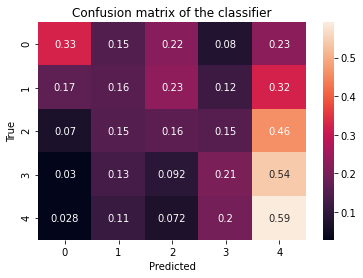

In [23]:
cm = confusion_matrix(Y_test, Y_test_predictions_knn_original, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
Y_test_predictions_knn_stop = Knn_model_stop.predict(X_test_cv_stop)
print("RMSE on testing set = ", mean_squared_error(Y_test.head(int(len(Y_test.index)*0.7)), Y_test_predictions_knn_stop))

<h4> SVC Model </h4>

In [ ]:
Y_test_predictions_svc = svc.predict(X_test_processed.drop(columns=['Text']))
print("RMSE on testing set = ", mean_squared_error(Y_test, Y_test_predictions_svc))

<h4> Naive Bayes Model </h4>

<h5> Text </h5>

In [ ]:
print("RMSE on testing set = ", mean_squared_error(Y_test, pip_pred))

In [23]:
#Naive Bayes model 1-gram
Y_test_predictions_mnb = mnb.predict(X_test_cv)
print("RMSE on testing set = ", mean_squared_error(Y_test, Y_test_predictions_mnb))

RMSE on testing set =  1.3147233258149094


In [82]:
X_test_cv.shape

(349364, 1885017)

In [81]:
X_submission_cv.shape

(300000, 761199)

In [25]:
X_submission_raw['Score'] = mnb.predict(X_submission_cv)

In [ ]:
#Naive Bayes model 2-gram
Y_test_predictions_mnb2 = mnb2.predict(X_test_cv2)
print("RMSE on testing set = ", mean_squared_error(Y_test, Y_test_predictions_mnb2))

In [ ]:
#Naive Bayes model tf-idf
Y_test_predictions_mnb_tfidf = mnb_tfidf.predict(X_test_tfidf)
print("RMSE on testing set = ", mean_squared_error(Y_test, Y_test_predictions_mnb_tfidf))

In [ ]:
cm = confusion_matrix(Y_test, Y_test_predictions_mnb, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
cm = confusion_matrix(Y_test, Y_test_predictions_mnb, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

<h5> Text with removing </h5>

In [ ]:
Y_test_predictions_mnb_nostop = mnb_nostop.predict(X_test_cv_stop)
print("RMSE on testing set = ", mean_squared_error(Y_test.head(int(len(Y_test.index)*0.7)), Y_test_predictions_mnb_nostop))

<h5> Summary </h5>

In [ ]:
Y_test_predictions_mnb = mnb_summary.predict(X_test_summary_cv)
print("RMSE on testing set = ", mean_squared_error(Y_test_summary, Y_test_predictions_mnb))

In [ ]:
cm = confusion_matrix(Y_test_summary, Y_test_predictions_mnb, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
Y_test_predictions_mnb2 = mnb2_summary.predict(X_test_summary_cv2)
print("RMSE on testing set = ", mean_squared_error(Y_test_summary, Y_test_predictions_mnb2))

In [ ]:
Y_test_predictions_mnb_tfidf = mnb_tfidf_summary.predict(X_test_summary_tfidf)
print("RMSE on testing set = ", mean_squared_error(Y_test_summary, Y_test_predictions_mnb_tfidf))

# Create the submission file

In [26]:
submission = X_submission_raw[['Id', 'Score']]
submission.to_csv("./data/submission.csv", index=False)